# Fase 1: EDA

Equipo 55

Nombres y matrículas de los integrantes del Equipo:

*   Mario Arturo Salinas Rodriguez - A01796938
*   Ivan Rodriguez Apolinar - A01796052
*   Kailin Wu - A00830574
*   Jorge Zepeda Tinoco - A01797233
*   Marilyn Sofia Mori Castillo - A01796415

In [36]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_parquet('../../data/clean/steel_energy_clean.parquet')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
index,,,,,,,,,,,,
0,2018-01-01 00:15:00,3.17,2.95,0.000000,2.605081,73.21,100.0,900.0,WEEKDAY,MONDAY,LIGHT_LOAD,649.0
1,2018-01-01 00:30:00,4.00,4.46,7.568952,0.000000,66.77,100.0,1800.0,WEEKDAY,MONDAY,LIGHT_LOAD,495.0
2,2018-01-01 00:45:00,3.24,3.28,0.000000,0.000000,70.28,100.0,2700.0,WEEKDAY,MONDAY,LIGHT_LOAD,696.0
3,2018-01-01 01:00:00,3.31,3.56,0.000000,0.000000,68.09,100.0,3600.0,WEEKDAY,MONDAY,LIGHT_LOAD,630.0
4,2018-01-01 01:15:00,3.82,4.50,0.000000,0.000000,64.72,100.0,4500.0,WEEKDAY,MONDAY,LIGHT_LOAD,325.0


In [38]:
# Orden temporal
df = df.sort_values("date").reset_index(drop=True)

# Identificar columnas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

display(df.head(3))
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nResumen numérico:")
display(df[num_cols].describe().T)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,2018-01-01 00:00:00,3.42,3.46,7.568952,0.000000,70.30,100.0,0.0,WEEKDAY,MONDAY,LIGHT_LOAD,907.0
1,2018-01-01 00:15:00,3.17,2.95,0.000000,2.605081,73.21,100.0,900.0,WEEKDAY,MONDAY,LIGHT_LOAD,649.0
2,2018-01-01 00:30:00,4.00,4.46,7.568952,0.000000,66.77,100.0,1800.0,WEEKDAY,MONDAY,LIGHT_LOAD,495.0


Shape: (35412, 12)

Tipos:
 date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                            float64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
mixed_type_col                                 float64
dtype: object

Resumen numérico:


,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35412.0,39.227816,270.172301,0.0,3.28,5.08,49.720000,34899.48
Lagging_Current_Reactive.Power_kVarh,35412.0,18.885702,88.752481,0.0,2.84,5.29,21.390000,6145.92
Leading_Current_Reactive_Power_kVarh,35412.0,7.533636,51.466410,0.0,0.00,0.00,7.568952,1694.22
CO2(tCO2),35412.0,2.578354,39.789978,0.0,0.00,0.00,0.030000,1364.04
Lagging_Current_Power_Factor,35412.0,101.497869,304.970842,0.0,65.50,89.61,100.000000,9900.00
Leading_Current_Power_Factor,35412.0,109.789186,363.262362,0.0,99.91,100.00,100.000000,9800.00
NSM,35412.0,52605.123777,186114.558018,0.0,22500.00,45900.00,63000.000000,7783200.00
mixed_type_col,35412.0,496.844403,241.897776,0.0,351.00,495.00,638.000000,999.00


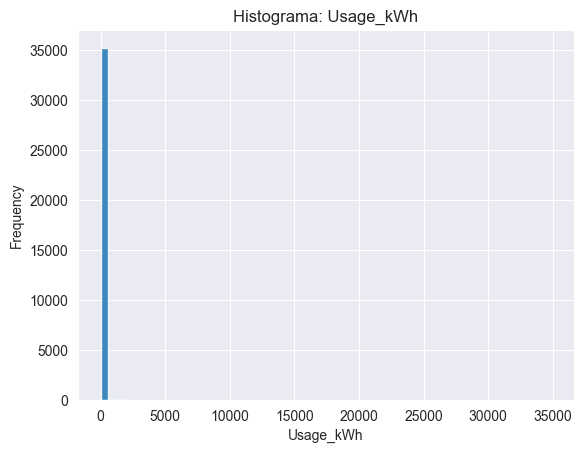

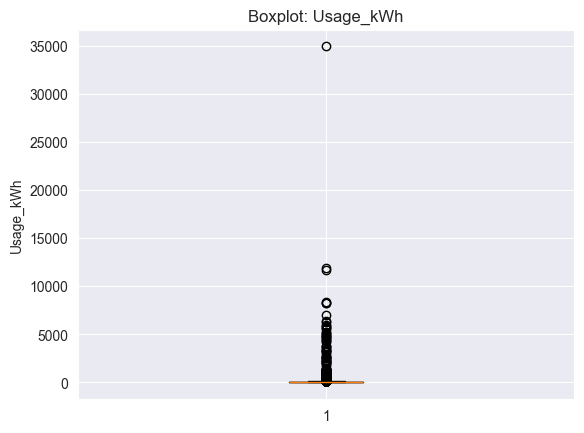

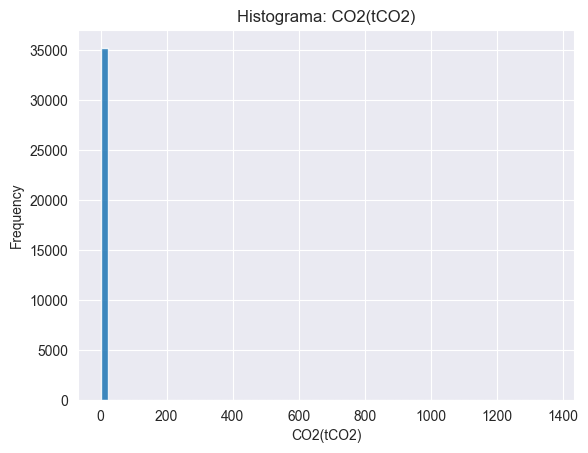

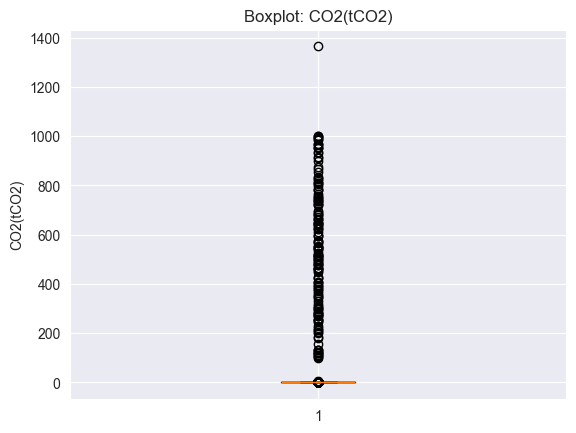

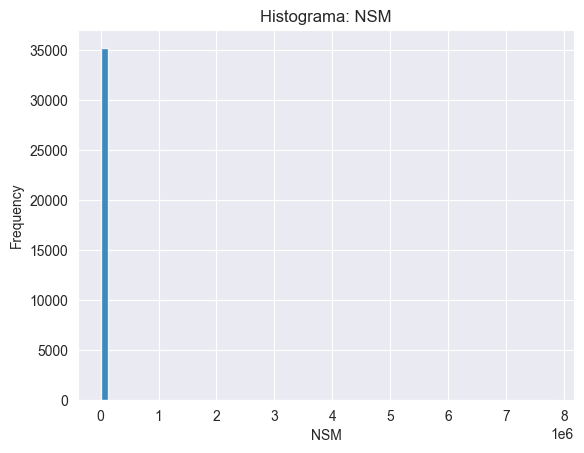

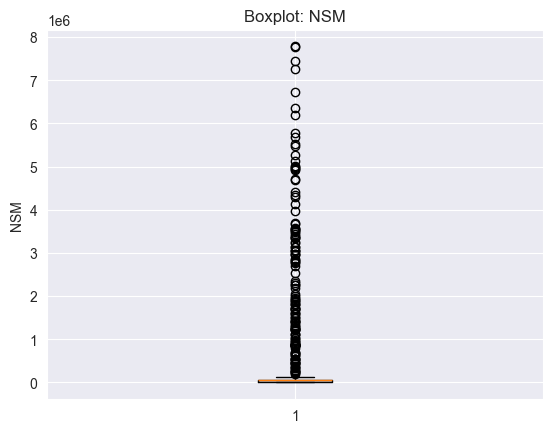

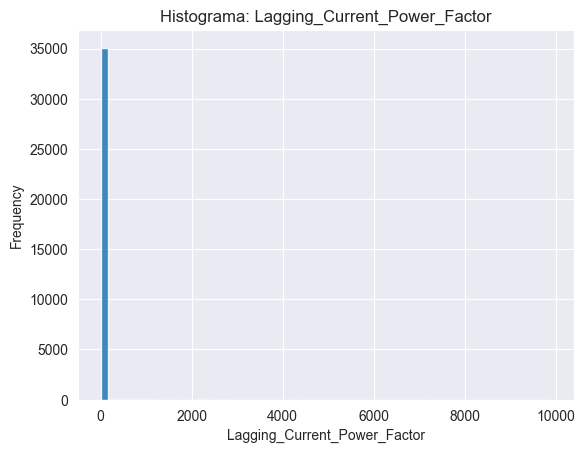

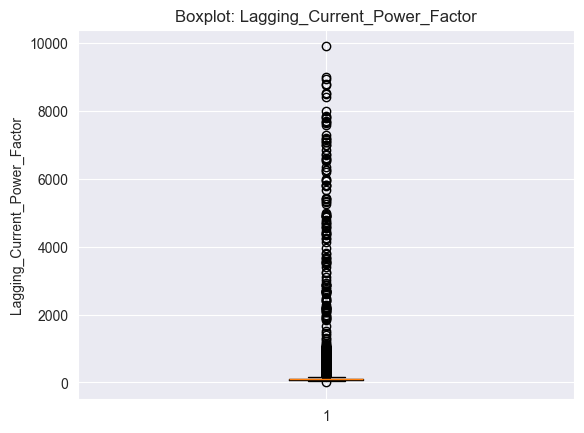

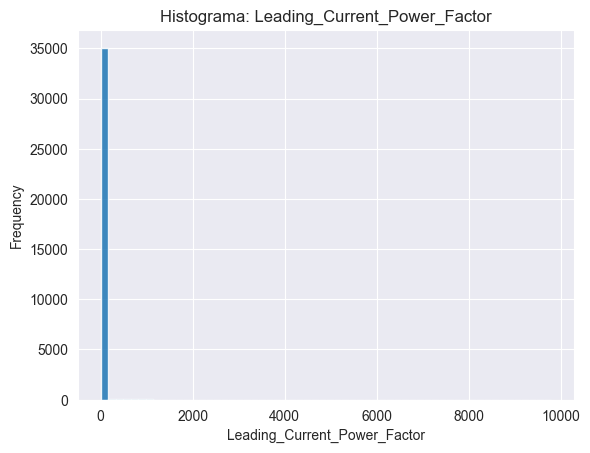

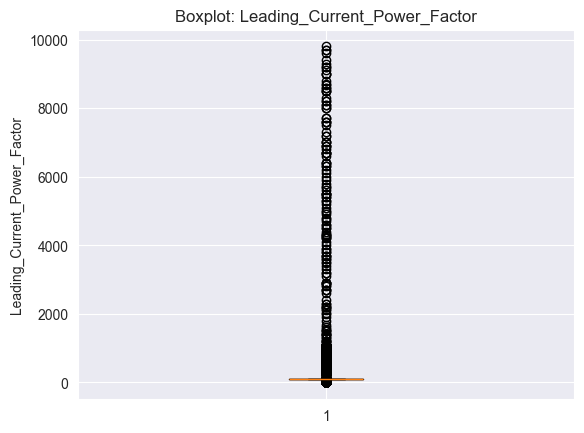

In [39]:
# Lista de métricas de interés
focus_cols = [c for c in [
    "Usage_kWh", "CO2(tCO2)", "NSM",
    "Lagging_Current_Power_Factor", "Leading_Current_Power_Factor"
] if c in df.columns]

for col in focus_cols:
    # Histograma
    plt.figure()
    df[col].plot(kind="hist", bins=60, alpha=0.85, title=f"Histograma: {col}")
    plt.xlabel(col); plt.grid(True); plt.show()

    # Boxplot
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col); plt.grid(True); plt.show()

In [40]:
# Calcular el IQR y los límites
outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    # Guardar la información en un diccionario
    outlier_info[col] = {
        'Q1':Q1,
        'Q3':Q3,
        'IQR':IQR,
        'Limite inferior':limite_inferior,
        'Limite superior':limite_superior
    }

In [41]:
# Identificar outliers y calcular el porcentaje
for col in num_cols:
    limite_inferior = outlier_info[col]['Limite inferior']
    limite_superior = outlier_info[col]['Limite superior']

    # Identificar outliers
    outliers = df[(df[col]<limite_inferior) | (df[col]>limite_superior)]

    # Calcular el porcentaje de outliers
    porcentaje_outliers = (outliers.shape[0]/df.shape[0])*100

    print(col, porcentaje_outliers)

Usage_kWh 2.132045634248277
Lagging_Current_Reactive.Power_kVarh 4.888173500508302
Leading_Current_Reactive_Power_kVarh 6.9863323167287925
CO2(tCO2) 6.946797695696374
Lagging_Current_Power_Factor 0.9064723822433073
Leading_Current_Power_Factor 30.918897548853497
NSM 0.40099401332881507
mixed_type_col 0.0


/var/folders/bm/r6rj4h091qv89n26qvw5lcnw0000gp/T/ipykernel_2188/1805854829.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s = df.set_index("date")[col].resample(rule).mean()


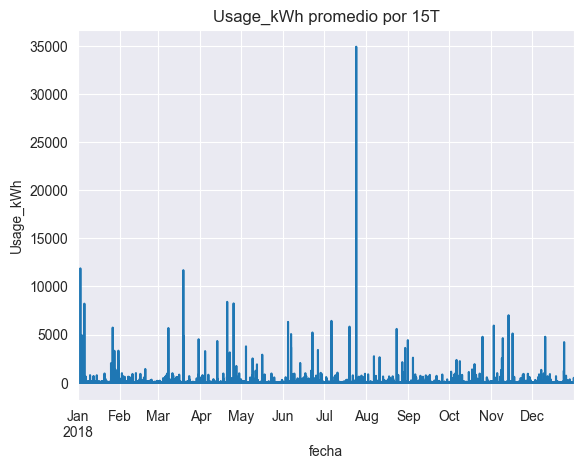

/var/folders/bm/r6rj4h091qv89n26qvw5lcnw0000gp/T/ipykernel_2188/1805854829.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  s = df.set_index("date")[col].resample(rule).mean()


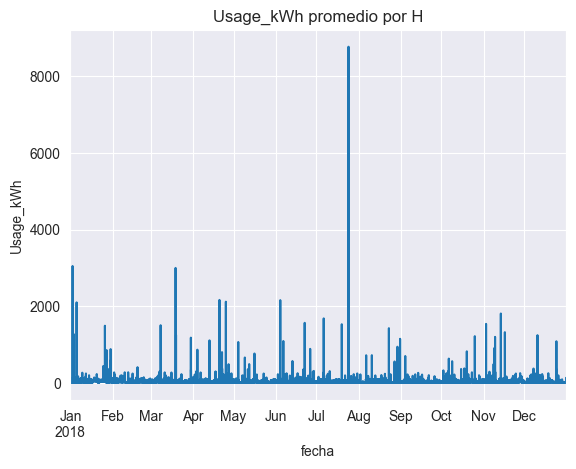

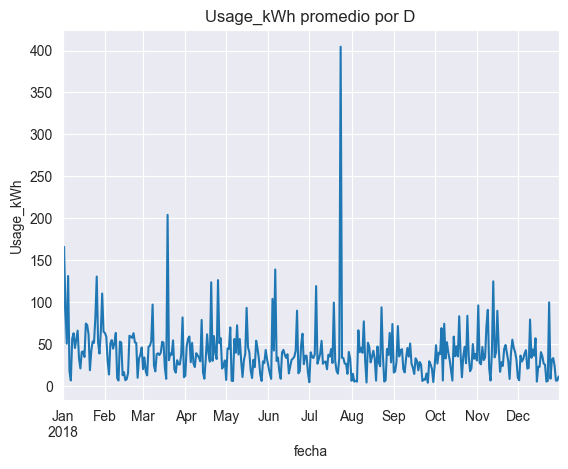

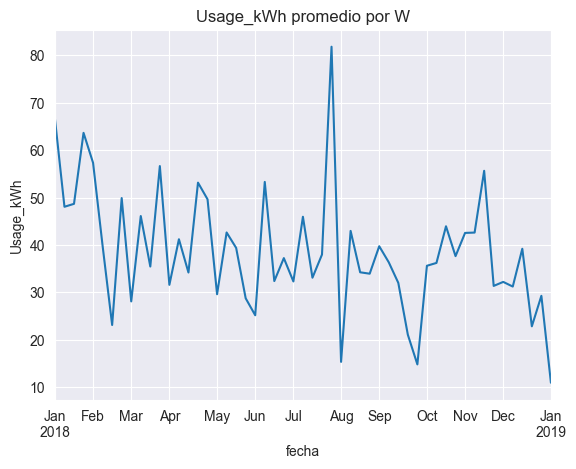

In [42]:
# Tendencias temporales
def ts_plot(col, rule):
    s = df.set_index("date")[col].resample(rule).mean()
    plt.figure()
    s.plot(title=f"{col} promedio por {rule}")
    plt.xlabel("fecha"); plt.ylabel(col); plt.grid(True); plt.show()

if "Usage_kWh" in df.columns:
    for rule in ["15T", "H", "D", "W"]:
        ts_plot("Usage_kWh", rule)

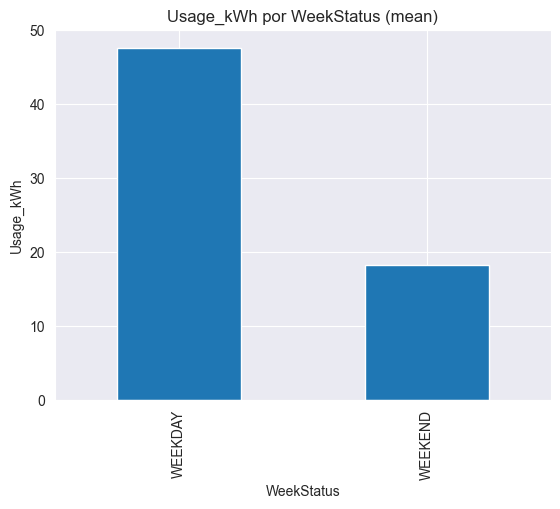

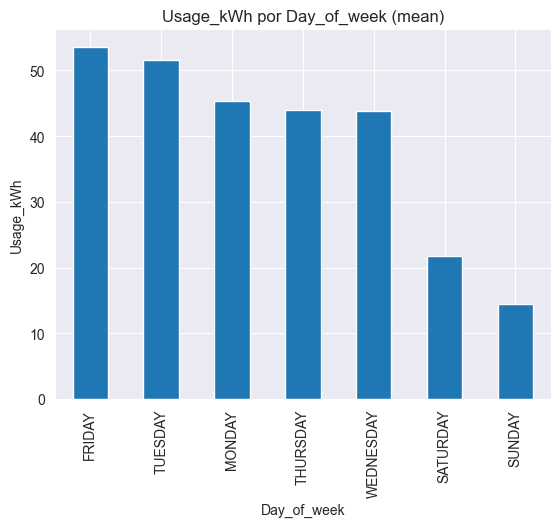

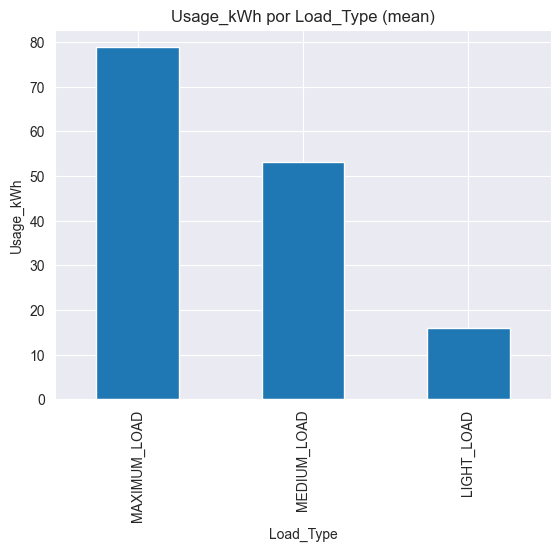

In [43]:
# Comparativas por categoría
def bar_by_category(value_col, cat_col, agg="mean"):
    tab = df.groupby(cat_col, dropna=False)[value_col].agg(agg).sort_values(ascending=False)
    plt.figure()
    tab.plot(kind="bar", title=f"{value_col} por {cat_col} ({agg})")
    plt.ylabel(value_col); plt.grid(True, axis="y"); plt.show()
    return tab

if "Usage_kWh" in df.columns:
    for cat in ["WeekStatus", "Day_of_week", "Load_Type"]:
        if cat in df.columns:
            bar_by_category("Usage_kWh", cat, agg="mean")

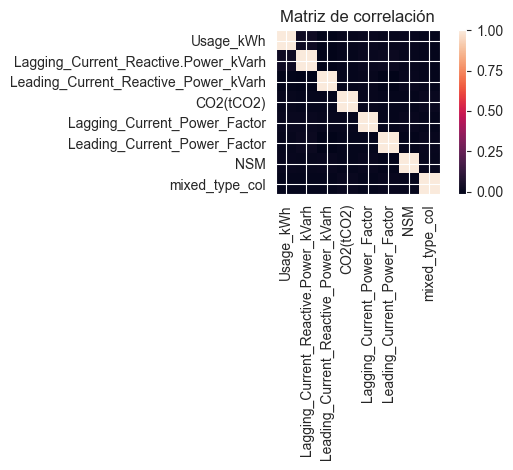

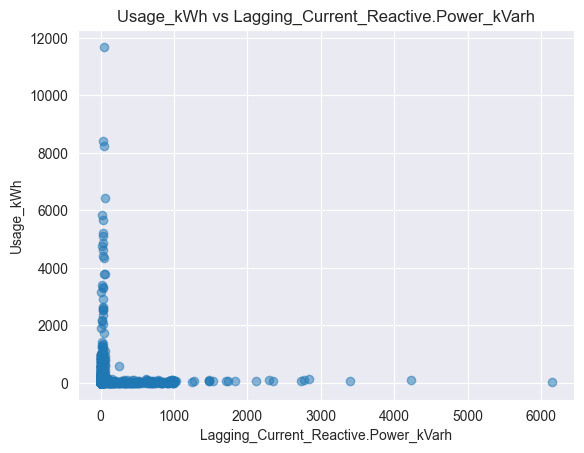

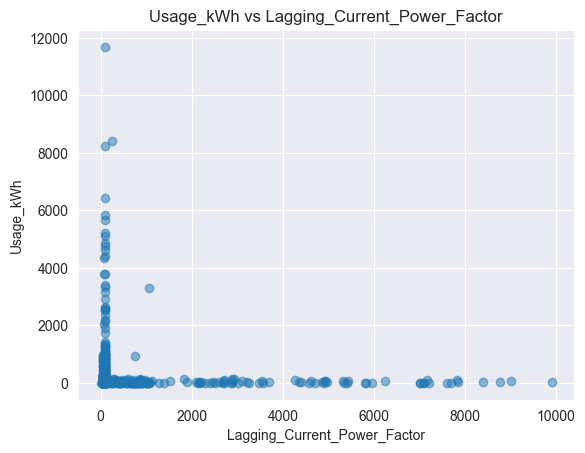

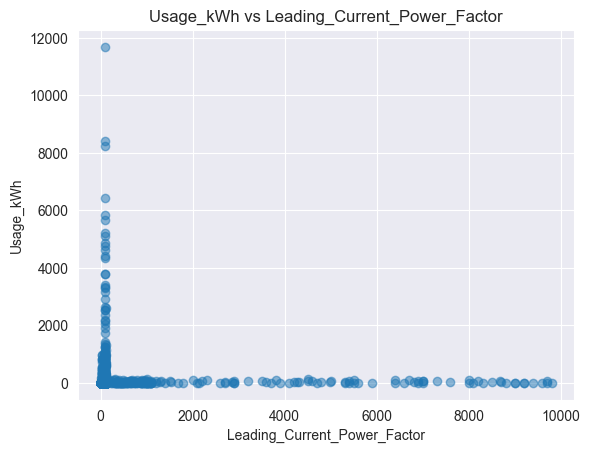

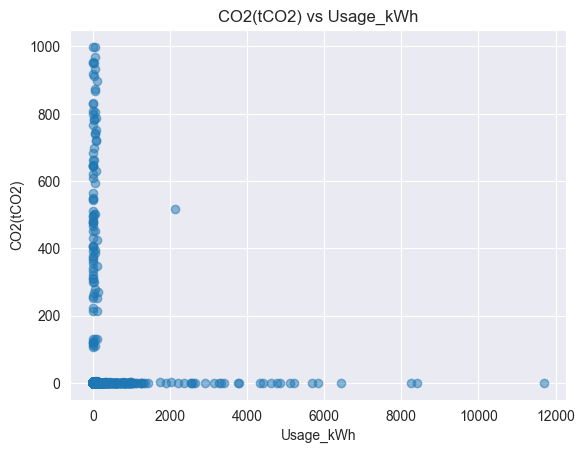

In [44]:
# Relaciones bivariadas y correlaciones

# Matriz de correlación (solo numéricas)
corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)

plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.title("Matriz de correlación")
plt.colorbar()
ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)
plt.tight_layout()
plt.show()

# Dispersión de pares relevantes (ajusta a tus columnas)
pairs = [
    ("Lagging_Current_Reactive.Power_kVarh", "Usage_kWh"),
    ("Leading_Current_Reactive.Power_kVarh", "Usage_kWh"),
    ("Lagging_Current_Power_Factor", "Usage_kWh"),
    ("Leading_Current_Power_Factor", "Usage_kWh"),
    ("Usage_kWh", "CO2(tCO2)")
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        sample = df[[x, y]].dropna()
        if len(sample) > 20000:  # muestreo para plots más ligeros
            sample = sample.sample(20000, random_state=42)
        plt.figure()
        plt.scatter(sample[x], sample[y], alpha=0.5)
        plt.title(f"{y} vs {x}")
        plt.xlabel(x); plt.ylabel(y); plt.grid(True); plt.show()

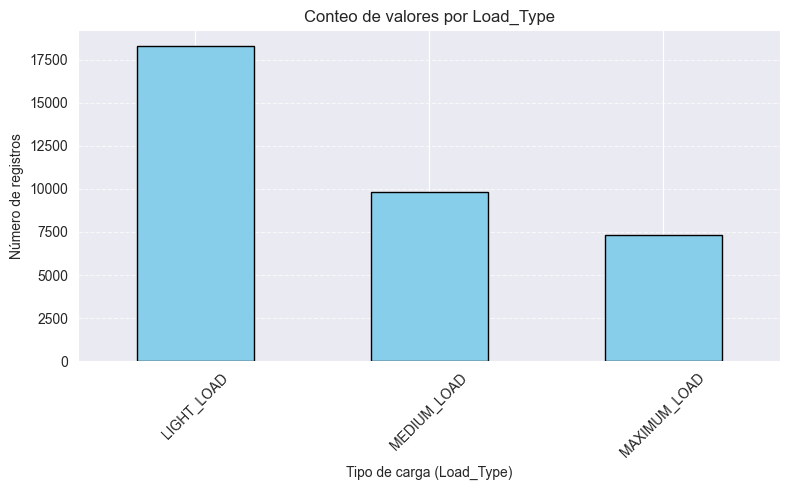

In [45]:
# Desbalanceo de clases
load_counts = df["Load_Type"].value_counts()

# Gráfica de barras
plt.figure(figsize=(8, 5))
load_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Conteo de valores por Load_Type")
plt.xlabel("Tipo de carga (Load_Type)")
plt.ylabel("Número de registros")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()